In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import librosa
import tensorflow.keras
import sklearn
import math
import seaborn

from tqdm.notebook import tqdm
from sklearn import model_selection
from librosa import display
from librosa import util
from scipy.io import wavfile
from IPython import display

In [4]:
desired_duration = 2 # secs
desired_channel_count = 1

# parameters for the fourier transform
window_size = 2000

# 50% overlap results in useful data
window_overlap = int(window_size * 0.5)

rft_ids = np.array(['x', 'x', 'x', 'x', 'x', 
                    'x', 'x', 'x', 'x', 'x', 
                    'x', 'x', 'x'])

recording_persons = np.array(['m1', 'm2', 'm3', 'w1', 'w2', 'w3'])

recorded_commands = np.array(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10'])

command_variants = np.array(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 
                             'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 
                             'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30'])

label_descriptions = np.array(['links', 'rechts', 'vor', 'zurück', 'start', 
                   'stop', 'schneller', 'langsamer', 'drehung links', 'drehung rechts'])

sample_count = len(rft_ids) * 1800 # amount of samples

all_mfccs = np.empty((sample_count, 20, 41), dtype=float)
all_labels = np.empty((sample_count), dtype=float)

In [5]:
# only execute this cell, if you want to read and format all the input samples again
# this will take several minutes

sample_counter = 0
for rft_id in rft_ids:
    for recording_person in recording_persons:
        for recorded_command in recorded_commands:
            for command_variant in command_variants:
                # load the binary .wav audio data
                filename = str(rft_id) + '_' + str(recording_person) + '_' + str(recorded_command) + '_' + str(command_variant) + '.wav'
                (sample_rate, recording) = wavfile.read('.../daten/' + filename, mmap=False)

                corresponding_label = float(np.where(recorded_commands == recorded_command)[0][0])

                # convert the int16s to float32s
                recording = recording.astype(np.float32)
                
                recording -= recording.mean()
                max_amplitude = max(recording.max(), -recording.min())
                if(max_amplitude != 0.0):
                    recording /= max_amplitude

                # do some error checking and fixing
                if(len(recording.shape) != desired_channel_count):
                    print(rft_id)
                    # recording = librosa.to_mono(recording)
                if(sample_rate != 20000):
                    print('ERROR: wrong sample rate\n')
                if(type(recording[0]) != np.float32):
                    print('ERROR: wrong bits per samples @ ' + str(filename) + ' \n')

                # truncate / pad every recording to exactly 40,000 samples
                recording = librosa.util.fix_length(recording, sample_rate * desired_duration)

                # calculate mfccs of the recording
                mfccs = librosa.feature.mfcc(y=recording, sr=sample_rate, win_length=window_size, hop_length=window_overlap)
                
                # librosa.display.specshow(mfccs, sr=sample_rate, hop_length=window_overlap)
                # plt.show()

                if(mfccs.shape[0] != 20 or mfccs.shape[1] != 41):
                    print('ERROR: wrong mfcc shape. @ ' + str(filename) + ': ' + str(mfccs.shape));

                all_mfccs[sample_counter] = mfccs
                all_labels[sample_counter] = corresponding_label
                sample_counter += 1
                print(str(int((sample_counter / sample_count)*100)) + '%')

print(str(sample_counter))
np.save('preprocessed_mfccs.npy', all_mfccs)
np.save('preprocessed_labels.npy', all_labels)
                
print("done.")

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1

11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
11%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%
12%


20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
20%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%
21%


29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
29%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%
30%


37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
37%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%
38%


C:\Users\paulf\AppData\Local\Temp/ipykernel_14596/2909288276.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  (sample_rate, recording) = wavfile.read('datensätze/' + filename, mmap=False)



46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
46%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%
47%

55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
55%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%
56%


63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
63%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%
64%


72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
72%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%
73%


81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
81%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%
82%


90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
90%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%
91%


99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
99%
100%
23400
done.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 17, 38, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 19, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 16, 512)        262656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 8, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 8, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

c:\users\paulf\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


622/622 - 8s - loss: 1.8992 - accuracy: 0.3332 - val_loss: 0.4538 - val_accuracy: 0.8772
Epoch 2/100
622/622 - 3s - loss: 0.4481 - accuracy: 0.8508 - val_loss: 0.1577 - val_accuracy: 0.9541
Epoch 3/100
622/622 - 3s - loss: 0.2739 - accuracy: 0.9138 - val_loss: 0.1295 - val_accuracy: 0.9558
Epoch 4/100
622/622 - 3s - loss: 0.2158 - accuracy: 0.9319 - val_loss: 0.1044 - val_accuracy: 0.9675
Epoch 5/100
622/622 - 3s - loss: 0.1983 - accuracy: 0.9378 - val_loss: 0.0924 - val_accuracy: 0.9672
Epoch 6/100
622/622 - 3s - loss: 0.1836 - accuracy: 0.9430 - val_loss: 0.0933 - val_accuracy: 0.9695
Epoch 7/100
622/622 - 3s - loss: 0.1601 - accuracy: 0.9497 - val_loss: 0.0817 - val_accuracy: 0.9783
Epoch 8/100
622/622 - 3s - loss: 0.1525 - accuracy: 0.9522 - val_loss: 0.0945 - val_accuracy: 0.9721
Epoch 9/100
622/622 - 3s - loss: 0.1491 - accuracy: 0.9553 - val_loss: 0.0835 - val_accuracy: 0.9752
Epoch 10/100
622/622 - 3s - loss: 0.1445 - accuracy: 0.9551 - val_loss: 0.0890 - val_accuracy: 0.9752
E

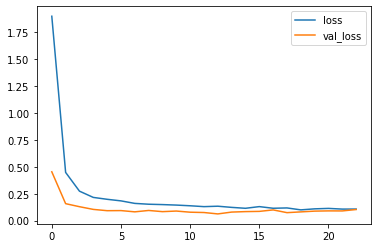

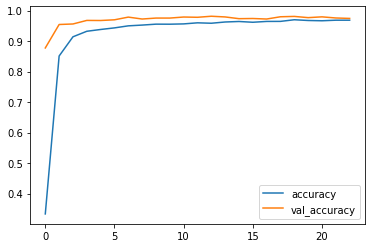

In [6]:
nn_input = np.load('preprocessed_mfccs.npy')
nn_labels = np.load('preprocessed_labels.npy')

# split data into training and test sets

nn_training_inputs, nn_test_inputs, nn_training_labels, nn_test_labels = model_selection.train_test_split(nn_input, nn_labels, test_size=0.15, random_state=32, shuffle=True)

nn_training_inputs = np.reshape(nn_training_inputs, (nn_training_inputs.shape[0], nn_training_inputs.shape[1], nn_training_inputs.shape[2], 1))
nn_test_inputs = np.reshape(nn_test_inputs, (nn_test_inputs.shape[0], nn_test_inputs.shape[1], nn_test_inputs.shape[2], 1))

# build actual NN

epochs = 100
input_shape = nn_training_inputs.shape[1:]
output_shape = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (4, 4), input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(512, (4, 4), input_shape=input_shape, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(output_shape, activation='softmax'))

model.summary()

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics = ['accuracy'])

# run NN

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history = model.fit(x=nn_training_inputs, y=nn_training_labels, epochs=epochs, verbose=2, validation_data=(nn_test_inputs, nn_test_labels), shuffle=True, callbacks=[early_stopping])

metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

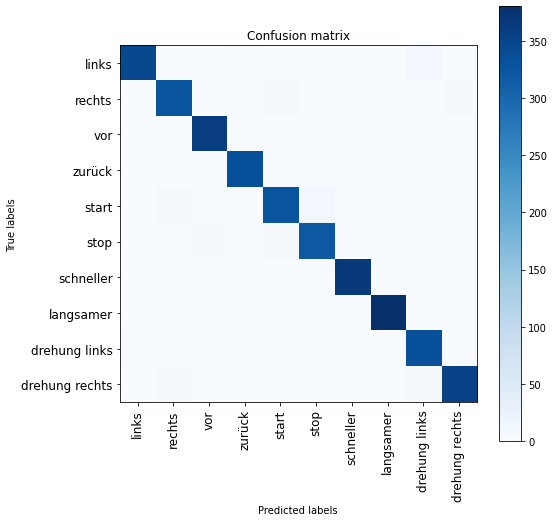

In [7]:
y = np.argmax(model.predict(nn_test_inputs), axis=1)
cm = sklearn.metrics.confusion_matrix(nn_test_labels, y,  normalize=None)

plt.close()
plt.figure(figsize = (8,8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(0, 10, 1), label_descriptions, rotation=90)
plt.yticks(np.arange(0, 10, 1), label_descriptions)
plt.tick_params(labelsize=12)
plt.title('Confusion matrix')
plt.colorbar()